<a href="https://colab.research.google.com/github/SahithiK792/ML/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded= files.upload()

for filename in uploaded.keys():
  print(filename)

Saving iotsim-air-quality-1 (1).csv to iotsim-air-quality-1 (1).csv
iotsim-air-quality-1 (1).csv


Question 1

In [ ]:
import numpy as np
import pandas as pd
def calculate_entropy(data):

    #Column into probabilities for the entropy formula.
    values, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()

    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

df = pd.read_csv('iotsim-air-quality-1 (1).csv')
target_column = df['label']
entropy_value = calculate_entropy(target_column)
print("Entropy of label column:", entropy_value)


Entropy of label column: 1.5432665845748064


Question 2

In [ ]:
import numpy as np
import pandas as pd
def calculate_gini_index(data):
    """
    Calculate the Gini Index for a categorical dataset/column.
    """
    values, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    gini = 1 - np.sum(probabilities ** 2)
    return gini

df = pd.read_csv('iotsim-air-quality-1 (1).csv')
gini_value = calculate_gini_index(df['label'])
print("Gini Index for label column:", gini_value)


Gini Index for label column: 0.6192814887098955


Question 3

In [ ]:
import pandas as pd
import numpy as np

def calculate_entropy(data):
    values, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(df, feature, target):
    """
    Calculate the Information Gain of splitting df on 'feature'
    for predicting 'target'.
    """
    df = pd.read_csv('iotsim-air-quality-1 (1).csv')
    total_entropy = calculate_entropy(df[target])
    values, counts = np.unique(df[feature], return_counts=True)
    weighted_entropy = 0
    for i, value in enumerate(values):
        subset = df[df[feature] == value][target]
        weighted_entropy += (counts[i] / counts.sum()) * calculate_entropy(subset)
    return total_entropy - weighted_entropy

def find_best_feature(df, target):
    """
    Return the feature with the highest Information Gain.
    """
    features = [col for col in df.columns if col != target]
    ig_values = {feature: information_gain(df, feature, target) for feature in features}
    best_feature = max(ig_values, key=ig_values.get)
    return best_feature, ig_values

# Example usage on a small subset (to avoid large computation time)
subset_df = df[['frame.protocols', 'ip.flags', 'ip.proto', 'label']]

best_feature, ig_values = find_best_feature(subset_df, target='label')
print("Best feature for root node:", best_feature)
print("Information Gain values:", ig_values)


Best feature for root node: frame.protocols
Information Gain values: {'frame.protocols': np.float64(0.5222914241442373), 'ip.flags': np.float64(0.06648245307476963), 'ip.proto': np.float64(0.47244532770389003)}


Question 4

In [ ]:
import pandas as pd
import numpy as np

def bin_data(data, bins=4, bin_type="width"):
    if bin_type == "width":
        # Equal Width Binning
        return pd.cut(data, bins=bins, labels=False, include_lowest=True)
    elif bin_type == "frequency":
        # Equal Frequency Binning
        return pd.qcut(data, q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("bin_type must be 'width' or 'frequency'")

# Example usage on a continuous column:
df['frame.len_binned'] = bin_data(df['frame.len'], bins=6, bin_type="frequency")
df[['frame.len', 'frame.len_binned']].head()


,frame.len,frame.len_binned
0,67,1
1,83,3
2,90,4
3,90,4
4,76,3


Question 5

In [ ]:
import pandas as pd
import numpy as np

# --- A1: Entropy function ---
def calculate_entropy(data):
    values, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# --- A4: Binning function ---
def bin_data(data, bins=4, bin_type="width"):
    if bin_type == "width":
        return pd.cut(data, bins=bins, labels=False, include_lowest=True)
    elif bin_type == "frequency":
        return pd.qcut(data, q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("bin_type must be 'width' or 'frequency'")

# --- A3: Information Gain ---
def information_gain(df, feature, target):
    total_entropy = calculate_entropy(df[target])
    values, counts = np.unique(df[feature], return_counts=True)
    weighted_entropy = 0
    for i, value in enumerate(values):
        subset = df[df[feature] == value][target]
        weighted_entropy += (counts[i] / counts.sum()) * calculate_entropy(subset)
    return total_entropy - weighted_entropy

# --- Find best feature ---
def find_best_feature(df, target):
    features = [col for col in df.columns if col != target]
    ig_values = {}
    for feature in features:
        if np.issubdtype(df[feature].dtype, np.number):
            # Apply binning before calculating IG
            df[feature] = bin_data(df[feature], bins=4, bin_type="width")
        ig_values[feature] = information_gain(df, feature, target)
    best_feature = max(ig_values, key=ig_values.get)
    return best_feature

# --- Recursive Decision Tree builder ---
def build_decision_tree(df, target):
    # If all labels are the same, return the label
    if len(np.unique(df[target])) == 1:
        return np.unique(df[target])[0]
    # If no features left, return most common label
    if len(df.columns) == 1:
        return df[target].mode()[0]

    # Choose best feature
    best_feature = find_best_feature(df.copy(), target)
    tree = {best_feature: {}}

    # Split and recurse
    for value in np.unique(df[best_feature]):
        subset = df[df[best_feature] == value].drop(columns=[best_feature])
        tree[best_feature][value] = build_decision_tree(subset, target)

    return tree

# Example: Use a smaller subset for speed
sample_df = df[['ip.ttl', 'ip.proto', 'label']].copy()
decision_tree = build_decision_tree(sample_df, target='label')

print("Decision Tree Structure:", decision_tree)


Decision Tree Structure: {'ip.proto': {np.int64(1): 'Benign', np.int64(6): {'ip.ttl': {np.int64(60): 'Ingress Tool Transfer', np.int64(61): 'Telnet Brute Force', np.int64(62): 'TCP Scan', np.int64(64): 'TCP Scan', np.int64(251): 'Unknown'}}, np.int64(17): 'Benign'}}


Question 6

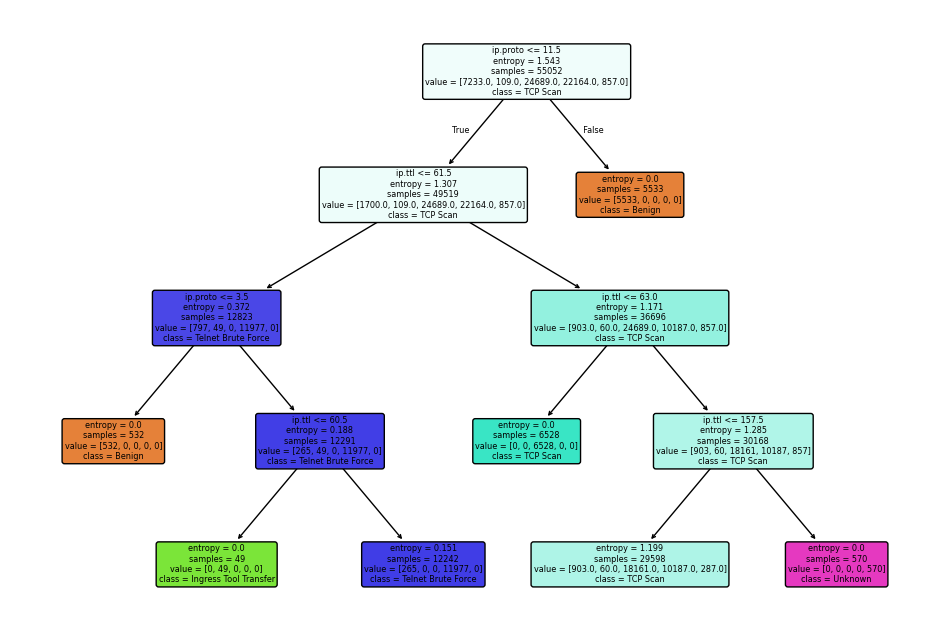

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Select subset of features used in our custom tree
features = ['ip.proto', 'ip.ttl']
X = df[features]
y = df['label']

# Fit a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=features, class_names=clf.classes_, filled=True, rounded=True)
plt.show()


Question 7

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


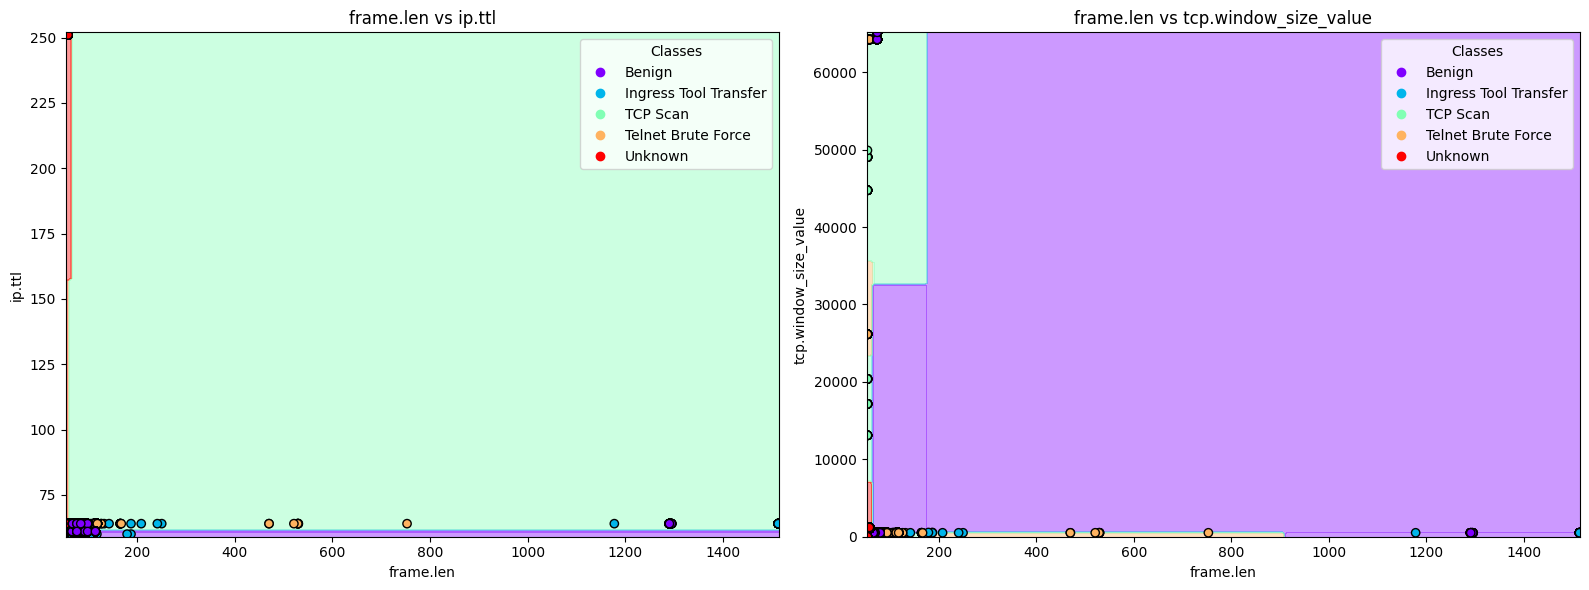

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

def decision_boundary_subplot(ax, feature_x, feature_y, filter_tcp=False):
    df = pd.read_csv('iotsim-air-quality-1 (1).csv')
    if filter_tcp:
        df_plot = df[df['ip.proto'] == 6].copy()
    else:
        df_plot = df.copy()

    X = df_plot[[feature_x, feature_y]].fillna(0)
    y = df_plot['label']

    clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
    clf.fit(X, y)

    x_min, x_max = X[feature_x].min() - 1, X[feature_x].max() + 1
    y_min, y_max = X[feature_y].min() - 1, X[feature_y].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    classes = list(np.unique(y))
    class_to_num = {label: i for i, label in enumerate(classes)}
    Z_num = np.vectorize(class_to_num.get)(Z)
    cmap = ListedColormap(plt.cm.rainbow(np.linspace(0, 1, len(classes))))

    ax.contourf(xx, yy, Z_num, alpha=0.4, cmap=cmap)
    scatter = ax.scatter(X[feature_x], X[feature_y],
                         c=np.vectorize(class_to_num.get)(y),
                         edgecolor='k', cmap=cmap)
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_title(f"{feature_x} vs {feature_y}")
    return scatter, classes

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Option 1: All protocols
scatter1, classes1 = decision_boundary_subplot(axes[0], 'frame.len', 'ip.ttl', filter_tcp=False)

# Option 2: TCP only
scatter2, classes2 = decision_boundary_subplot(axes[1], 'frame.len', 'tcp.window_size_value', filter_tcp=True)

# Add legends
axes[0].legend(handles=scatter1.legend_elements()[0], labels=classes1, title="Classes")
axes[1].legend(handles=scatter2.legend_elements()[0], labels=classes2, title="Classes")

plt.tight_layout()
plt.show()
